# Курсовой проект 
## по курсу "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn".

### Выполнил студент GeekBrains Титарчук К.



**Оглавление**
* [Основная часть курсовой работы]
    * [0. Загрузка данных](#load)
    * [1. Просмотр данных](#see_data)
    * [2. Подготовка и преобразование данных](#preproc)
    * [3. Построение новых признаков](#feature_engineering)
    * [4. Построение модели](#model_build)
    * [5. Прогнозирование на тестовом датасете](#prediction)
* [Дополнительная часть курсовой работы](#optional)

В курсовой работе используются данные, взятые из источника:
https://www.kaggle.com/c/real-estate-price-prediction-moscow/data

#### Загрузка данных  <a class='anchor' id='load'>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
my_train = pd.read_csv(r'C:\Users\Anokiro\courswork_ML\train.csv')
my_test = pd.read_csv(r'C:\Users\Anokiro\courswork_ML\test.csv')

#### Просмотр данных <a class='anchor' id='see_data'>

In [3]:
my_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [4]:
for i in my_train.columns:
    if True in my_train[i].isna().unique() or my_train[i].isnull().unique():
        print(f"   >>>>>>>> !!! В данных есть пропуски, а именно в {i}")
    else:
        print(f"{i}. В этих данные нет пропусков")

Id. В этих данные нет пропусков
DistrictId. В этих данные нет пропусков
Rooms. В этих данные нет пропусков
Square. В этих данные нет пропусков
   >>>>>>>> !!! В данных есть пропуски, а именно в LifeSquare
KitchenSquare. В этих данные нет пропусков
Floor. В этих данные нет пропусков
HouseFloor. В этих данные нет пропусков
HouseYear. В этих данные нет пропусков
Ecology_1. В этих данные нет пропусков
Ecology_2. В этих данные нет пропусков
Ecology_3. В этих данные нет пропусков
Social_1. В этих данные нет пропусков
Social_2. В этих данные нет пропусков
Social_3. В этих данные нет пропусков
   >>>>>>>> !!! В данных есть пропуски, а именно в Healthcare_1
Helthcare_2. В этих данные нет пропусков
Shops_1. В этих данные нет пропусков
Shops_2. В этих данные нет пропусков
Price. В этих данные нет пропусков


In [5]:
my_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


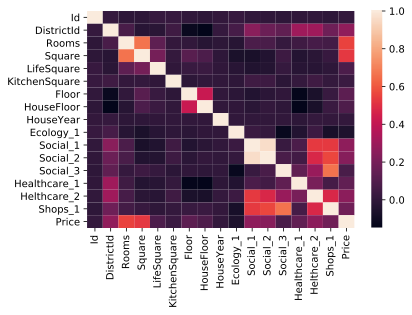

In [6]:
# выведем матрицу корреляций, чтобы понять взаимосвязь признаков
sns.heatmap(my_train.corr())

#### Подготовка и преобразование данных <a class='anchor' id='preproc'>

##### Square

In [7]:
# общая площадь(Square) не может быть меньше жилой площади(LifeSquare)
# Поэтому если общая площадь меньше жилой площади, то приравняем общую площадь к жилой.

for i, val in my_train['Square'].iteritems():
    if val < my_train['LifeSquare'][i]:
        my_train['Square'][i] = my_train['LifeSquare'][i]
        print(f'в строке с индексом {i} было заменено значение в признаке Square')

в строке с индексом 33 было заменено значение в признаке Square
в строке с индексом 64 было заменено значение в признаке Square
в строке с индексом 77 было заменено значение в признаке Square
в строке с индексом 100 было заменено значение в признаке Square
в строке с индексом 111 было заменено значение в признаке Square
в строке с индексом 142 было заменено значение в признаке Square
в строке с индексом 161 было заменено значение в признаке Square
в строке с индексом 165 было заменено значение в признаке Square
в строке с индексом 179 было заменено значение в признаке Square
в строке с индексом 213 было заменено значение в признаке Square
в строке с индексом 262 было заменено значение в признаке Square
в строке с индексом 282 было заменено значение в признаке Square
в строке с индексом 286 было заменено значение в признаке Square
в строке с индексом 328 было заменено значение в признаке Square
в строке с индексом 333 было заменено значение в признаке Square
в строке с индексом 348 было

##### Rooms

In [8]:
# Количество комнат не может быть нулевым.
# Для заполнения строк, где указаны нулевые значния напишем алгоритм, 
#  который будет заполнять нулевые значения другими значениями от 1.0 в зависимости от аналогичной площади других квартир:
# - возмет похожие квартиры с одинаковой площадью в одинаковом квартале;
# - из выбранных квартир подсчитает моду в количестве комнат(признак Rooms);
# - вычисленное значение моды присвоит соответствующей строке со значением 0.0 в признаке Rooms.

for i, val in my_train['Rooms'].iteritems():
    if val == 0.0 and len(my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Square'] < my_train['Square'].iloc[i] + 1) & (my_train['Square'] > my_train['Square'].iloc[i] - 1)]) > 6:
        table1 = my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Square'] < my_train['Square'].iloc[i] + 1) & (my_train['Square'] > my_train['Square'].iloc[i] - 1)]
        my_train['Rooms'][i] = table1['Rooms'].value_counts().index[0]
        print(f"строка {i} признака Rooms заменена на значение {table1['Rooms'].value_counts().index[0]}")
            
    if val == 0.0 and (len(my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Square'] < my_train['Square'].iloc[i] + 1) & (my_train['Square'] > my_train['Square'].iloc[i] - 1)]) in [3, 4, 5, 6]):
        table2 = my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Square'] < my_train['Square'].iloc[i] + 3) & (my_train['Square'] > my_train['Square'].iloc[i] - 3)]
        my_train['Rooms'][i] = table2['Rooms'].value_counts().index[0]
        print(f"строка {i} признака Rooms заменена на значение {table2['Rooms'].value_counts().index[0]}")

    if val == 0.0 and (len(my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Square'] < my_train['Square'].iloc[i] + 1) & (my_train['Square'] > my_train['Square'].iloc[i] - 1)]) == 2):
        table3 = my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Square'] < my_train['Square'].iloc[i] + 20) & (my_train['Square'] > my_train['Square'].iloc[i] - 20)]
        my_train['Rooms'][i] = table3['Rooms'].value_counts().index[0]
        print(f"строка {i} признака Rooms заменена на значение {table3['Rooms'].value_counts().index[0]}")
            
    if val == 0.0 and (len(my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Square'] < my_train['Square'].iloc[i] + 1) & (my_train['Square'] > my_train['Square'].iloc[i] - 1)]) == 1):
        table4 = my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Square'] < my_train['Square'].iloc[i] + 100) & (my_train['Square'] > my_train['Square'].iloc[i] - 100)]
        my_train['Rooms'][i] = table4['Rooms'].value_counts().index[0]
        print(f"строка {i} признака Rooms заменена на значение {table4['Rooms'].value_counts().index[0]}")
    
    if val < 0.0:
        print(f"Найдены отрицательные значения!!! Необходимо исправить {i} в признаке Rooms")
 

строка 2194 признака Rooms заменена на значение 1.0
строка 3780 признака Rooms заменена на значение 1.0
строка 5894 признака Rooms заменена на значение 2.0
строка 6401 признака Rooms заменена на значение 3.0
строка 7644 признака Rooms заменена на значение 3.0
строка 7929 признака Rooms заменена на значение 3.0
строка 9767 признака Rooms заменена на значение 3.0
строка 9869 признака Rooms заменена на значение 1.0


In [9]:
# Проверим нулевые значения в признаке Rooms (должен ничего не выдать)
my_train.loc[my_train['Rooms'] < 1.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [10]:
# При увеличении общей площади увеличивается и количество комнат.
# В признаке Rooms есть квартиры (в которых количество комнат > 5.0),
#  площадь которых соответствует площади других квартир, имеющих схожую площадь, но отличающихся по количеству комнат(как правило меньше комнат).
# Создадим алгоритм, который:
# - просмотрит в порядке очереди по списку все квартиры, где количество комнат > 5.0;
# - посмотрит в датафрейме все квартиры с похожей площадью (+- 6 кв.м);
# - подсчитает моду в признаке Rooms в заданном диапазоне площадей;
# - если итератор найдет другой объект со схожей площадью, но объект будет несильно отличаться от итерируемного объекта по количеству комнат,
#    то итератор пойдет дальше, оставив итерируемый объект таким какой он был;
 
for i, val in my_train['Rooms'].iteritems():
    if val > 5.0:
        step1 = my_train.loc[(my_train['Square'] < my_train['Square'].iloc[i] + 6) & (my_train['Square'] > my_train['Square'].iloc[i] - 6)].drop([i])
        step1_mod = step1['Rooms'].value_counts()
        if not step1_mod.empty and val > (step1['Rooms'].value_counts().index[0] + 1.0):
            my_train['Rooms'][i] = step1['Rooms'].value_counts().index[0]
            print(f"строка {i} признака Rooms заменена на значение {step1['Rooms'].value_counts().index[0]}")
            

строка 2004 признака Rooms заменена на значение 2.0
строка 2728 признака Rooms заменена на значение 2.0
строка 6088 признака Rooms заменена на значение 1.0
строка 8794 признака Rooms заменена на значение 2.0


##### LifeSquare

In [11]:
# Признак LifeSquare имеет пустые значения, что недопустимо.
# Напишем алгоритм, который:
# - пройдется по всем значениям в признаке LifeSquare;
# - если найдет пустые значения, то
# - подсчитает зависимость общей площади и жилой площади в аналогичном квартале и в квартирах с аналог-м кол-м комнат;
# - заполнит пропуски медианным значением;
# - а затем дополнительно еще раз проверит весь признак и установит значения по дефолту для тех, которые не были найдены алгоритмом.

for i, val in my_train['LifeSquare'].iteritems():
    if np.isnan(val):
        tabble = (my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['Rooms'] == my_train['Rooms'].iloc[i])])
        score = []
        for j, k in zip(tabble['Square'], tabble['LifeSquare']):
            sc_division = (tabble['Square'][i]) / (j / k)
            score.append(sc_division)
        sc_medain = pd.Series(score).dropna().median()
        if not np.isnan(sc_medain):
            my_train['LifeSquare'][i] = sc_medain
            print(f"строка {i}(NaN) в признаке LifeSquare заменена на {sc_medain}")
        
# Дополнительный алг-м, который проверит еще раз весь признак и установит минимальное значение, если основной алг-м не сработает.
if my_train['LifeSquare'].isna().sum() > 0:
    print(f"!!! {my_train['LifeSquare'].isna().sum()} были заменены вне алгоритма(замена на мин.значения по признаку LifeSquare)")
    my_train['LifeSquare'].fillna(my_train['LifeSquare'].min(), inplace=True)

строка 0(NaN) в признаке LifeSquare заменена на 77.67858378400909
строка 3(NaN) в признаке LifeSquare заменена на 38.462352907209066
строка 18(NaN) в признаке LifeSquare заменена на 45.28924399110272
строка 20(NaN) в признаке LifeSquare заменена на 41.23990180759216
строка 24(NaN) в признаке LifeSquare заменена на 25.755374190573388
строка 25(NaN) в признаке LifeSquare заменена на 43.33434824171543
строка 30(NaN) в признаке LifeSquare заменена на 40.154893968212455
строка 35(NaN) в признаке LifeSquare заменена на 62.72087184263708
строка 38(NaN) в признаке LifeSquare заменена на 52.89714871990177
строка 44(NaN) в признаке LifeSquare заменена на 74.62367895703616
строка 47(NaN) в признаке LifeSquare заменена на 59.017697807620074
строка 57(NaN) в признаке LifeSquare заменена на 76.03749298442796
строка 59(NaN) в признаке LifeSquare заменена на 30.346930958849278
строка 61(NaN) в признаке LifeSquare заменена на 40.16433148515199
строка 62(NaN) в признаке LifeSquare заменена на 41.6811261

In [12]:
my_train['LifeSquare'].isna().sum()

0

In [13]:
# В признаке LifeSquare имеются наблюдения, которые нарушают соотношение общей площади и жилой площади
#  (имеются значения значительно ниже, чем они должны быть).
# Напишем алгоритм, который:
# - найдет все квартиры с жилой площадью, которая значительно ниже обычных значений (минимум примерно 0.2 от общей площади);
# - заменит найденные значения;

count = 0
for j, k in zip(my_train['LifeSquare'], my_train['Square']):
    if (j / k) < 0.2:
        print(f"найдено {j}")
        i = (my_train.loc[my_train['LifeSquare'] == j]['LifeSquare']).index[0]
        my_train['LifeSquare'][i] = ((my_train.loc[my_train['Square'] == k]['Square'].values[0]) * 0.8)
        count += 1
        print(f"строка {i} в признаке 'LifeSquare' заменена на {((my_train.loc[my_train['Square'] == k]['Square'].values[0]) * 0.8)}\n")
print(f'Всего заменено {count} значений')

найдено 4.7691744289810005
строка 26 в признаке 'LifeSquare' заменена на 66.6100239001356

найдено 0.7955394676818128
строка 119 в признаке 'LifeSquare' заменена на 50.87339189874901

найдено 3.0643197118317236
строка 212 в признаке 'LifeSquare' заменена на 31.149589177457894

найдено 1.944445716025533
строка 227 в признаке 'LifeSquare' заменена на 37.37763321532557

найдено 4.091944920685359
строка 258 в признаке 'LifeSquare' заменена на 49.06797422304277

найдено 1.7262697385037575
строка 270 в признаке 'LifeSquare' заменена на 34.582175355880615

найдено 2.2285924585719945
строка 303 в признаке 'LifeSquare' заменена на 30.24418486210385

найдено 3.977650156541018
строка 556 в признаке 'LifeSquare' заменена на 66.30638264335144

найдено 3.5296462196811382
строка 575 в признаке 'LifeSquare' заменена на 52.810073344756645

найдено 3.605018535806884
строка 593 в признаке 'LifeSquare' заменена на 38.311788879536856

найдено 4.174626535195868
строка 629 в признаке 'LifeSquare' заменена на

##### KitchenSquare

In [14]:
# Площадь кухни в некоторых наблюдених в признаке KitchenSquare не соответствует размерам квартиры.
# Однако достоверно опеределить где именно была совершена ошибка при заполнении признаков 'LifeSquare' или 'KitchenSquare'
#  не предстваляется возможным.
# В этой связи обработаем только выбросы, которые больше общей площади квартиры.
# Напишем алгоритм, который:
# - найдет все выбросы, где площадь кухни больше общей площади; 
# - заменит такие значения на 0.9 от общей площади.

for i, val in my_train['KitchenSquare'].iteritems():
    if val > my_train['Square'][i]:
        my_train['KitchenSquare'][i] = round(my_train['Square'][i] * 0.9, 0)
        print(f"строка {i} в признаке KitchenSquare была заменена на {my_train['Square'][i] * 0.9}")

# Дополнительный алгоритм (если алгоритм пропустит какие-либо некорректные значения)
for i in my_train.index:
    if my_train['KitchenSquare'][i] > my_train['Square'][i]:
        print(f"{i} не исправлено")

строка 2785 в признаке KitchenSquare была заменена на 34.39823243932267
строка 5273 в признаке KitchenSquare была заменена на 34.264523116461014
строка 6505 в признаке KitchenSquare была заменена на 29.048996592536433
строка 9520 в признаке KitchenSquare была заменена на 42.39064688874751


##### HouseYear , HouseFloor

In [15]:
# Общая этажность дома не может быть меньше, чем этаж.
# Однако сначало поправим дату постройки дома.
# Напишем алгоритм, который:
# - найдет некорректное значение в признаке HouseYear;
# - заменит его на медиану, рассчитанную из года постройки домов в аналогичном квартале;

for i, val in my_train['HouseYear'].iteritems():
    if val < 1800:
        my_train['HouseYear'][i] = 1800
    if val > 2021:
        h_table = my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i])]
        h_table_m = h_table['HouseYear'].median()
        my_train['HouseYear'][i] = round(h_table_m, 0)
        print(f"строка {i} признака HouseYear была заменена на {h_table_m}")
print('------- \n')       
# -------------------------------------------------------------
# Затем поправим этажность дома.
# Напишем алгоритм, который:
# - найдет этажность дома, которая меньше этажа, на котором размещена квартира;
# - заменит некорректное значение в этажности дома на максимальное значение этажности домов в
#    аналогичном квартале в домах с одинаковым годом постройки и одинаковым показателем экологии.

for i, val in my_train['HouseFloor'].iteritems():
    if my_train['HouseFloor'][i] < my_train['Floor'][i]:
        h_val = my_train.loc[(my_train['DistrictId'] == my_train['DistrictId'].iloc[i]) & (my_train['HouseYear'] == my_train['HouseYear'].iloc[i]) & (my_train['Ecology_1'] == my_train['Ecology_1'].iloc[i])]
        h_val_m = h_val['HouseFloor'].max()  
        my_train['HouseFloor'][i] = h_val_m
        print(f"строка {i} в признаке HouseFloor заменена на {h_val_m}")

# Дополнительный агоритм, который проверит заполнение и заполнит сам, если предыдущий не подобрал подходящие значения
# или подобрал их некорректно.
for i, val in my_train['HouseFloor'].iteritems():
    if my_train['HouseFloor'][i] < my_train['Floor'][i]:
        my_train['HouseFloor'][i] = my_train['Floor'][i]
        print(f"Дополнительно было заменено: строка {i} признака HouseFloor на значение {my_train['Floor'][i]}")


строка 8828 признака HouseYear была заменена на 1968.0
строка 9163 признака HouseYear была заменена на 1985.0
------- 

строка 17 в признаке HouseFloor заменена на 14.0
строка 19 в признаке HouseFloor заменена на 25.0
строка 21 в признаке HouseFloor заменена на 9.0
строка 24 в признаке HouseFloor заменена на 25.0
строка 25 в признаке HouseFloor заменена на 25.0
строка 26 в признаке HouseFloor заменена на 23.0
строка 33 в признаке HouseFloor заменена на 99.0
строка 34 в признаке HouseFloor заменена на 20.0
строка 37 в признаке HouseFloor заменена на 18.0
строка 39 в признаке HouseFloor заменена на 5.0
строка 44 в признаке HouseFloor заменена на 25.0
строка 47 в признаке HouseFloor заменена на 25.0
строка 71 в признаке HouseFloor заменена на 22.0
строка 77 в признаке HouseFloor заменена на 25.0
строка 87 в признаке HouseFloor заменена на 25.0
строка 88 в признаке HouseFloor заменена на 14.0
строка 94 в признаке HouseFloor заменена на 20.0
строка 112 в признаке HouseFloor заменена на 25.0

##### Healthcare_1

In [16]:
# В признаке Healthcare_1 содержится слишком много пустых значений, поэтому заполним пустые значения случайным значением,
#  взятым из других значений самого же признака.

for i, val in my_train['Healthcare_1'].iteritems():
    if np.isnan(val):
        hc_val = np.random.choice(my_train['Healthcare_1'], 1)[0]
        while np.isnan(hc_val):
            hc_val = np.random.choice(my_train['Healthcare_1'], 1)[0]
        
        my_train['Healthcare_1'][i] = hc_val
        print(f"строка {i}(NaN) в признаке Healthcare_1 заменена на {hc_val}")

строка 0(NaN) в признаке Healthcare_1 заменена на 900.0
строка 3(NaN) в признаке Healthcare_1 заменена на 4087.0
строка 4(NaN) в признаке Healthcare_1 заменена на 1183.0
строка 8(NaN) в признаке Healthcare_1 заменена на 1970.0
строка 11(NaN) в признаке Healthcare_1 заменена на 540.0
строка 14(NaN) в признаке Healthcare_1 заменена на 1145.0
строка 15(NaN) в признаке Healthcare_1 заменена на 1183.0
строка 16(NaN) в признаке Healthcare_1 заменена на 30.0
строка 18(NaN) в признаке Healthcare_1 заменена на 30.0
строка 19(NaN) в признаке Healthcare_1 заменена на 1183.0
строка 22(NaN) в признаке Healthcare_1 заменена на 1970.0
строка 23(NaN) в признаке Healthcare_1 заменена на 2620.0
строка 24(NaN) в признаке Healthcare_1 заменена на 30.0
строка 26(NaN) в признаке Healthcare_1 заменена на 1406.0
строка 27(NaN) в признаке Healthcare_1 заменена на 2715.0
строка 29(NaN) в признаке Healthcare_1 заменена на 750.0
строка 30(NaN) в признаке Healthcare_1 заменена на 520.0
строка 33(NaN) в признаке He

In [17]:
# Преобразуем некоторые признаки в дамми-значения
my_train['Ecology_2'] = pd.get_dummies(my_train['Ecology_2'])
my_train['Ecology_3'] = pd.get_dummies(my_train['Ecology_3'])
my_train['Shops_2'] = pd.get_dummies(my_train['Shops_2'])

#### Построение новых признаков <a class='anchor' id='feature_engineering'>

##### Median_Price_Square_byDistr

In [18]:
my_train['Coef(Price/Square)'] = 0

In [19]:
# Создадим новый признак
for i, val in my_train['Square'].iteritems():
    my_train['Coef(Price/Square)'][i] = my_train['Price'][i] / val

In [20]:
Median_Price_Square_byDistr = my_train.groupby(['DistrictId'], as_index=False).agg({'Coef(Price/Square)':'median'})\
                            .rename(columns={'Coef(Price/Square)':'Median_Price_Square_byDistr'})

Median_Price_Square_byDistr.head(2)

,DistrictId,Median_Price_Square_byDistr
0,0,3935.0
1,1,3248.0


In [21]:
my_train = my_train.merge(Median_Price_Square_byDistr, on=['DistrictId'], how='left')
my_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Coef(Price/Square),Median_Price_Square_byDistr
0,11809,27,3.0,115.027311,77.678584,10.0,4,10.0,2014,0.075424,...,11,3097,0,900.0,0,0,0,305018.871089,2651,2755.0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,0,177734.553407,4462,3553.0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,0,282078.720850,3600,3248.0
3,2352,1,1.0,40.409907,38.462353,1.0,10,22.0,1977,0.007122,...,1,264,0,4087.0,0,1,0,168106.007630,4160,3248.0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,1183.0,0,6,0,343995.102962,5351,4219.0


In [22]:
my_train = my_train.drop('Coef(Price/Square)', axis=1)

##### All_Social

In [23]:
my_train['All_Social'] = my_train['Social_1'] + my_train['Social_2'] + my_train['Social_3']

##### Нормализация

In [24]:
from sklearn.preprocessing import MinMaxScaler
mn_scaler = MinMaxScaler()
cols_for_scale = ['DistrictId', 'Floor', 'HouseFloor', 'HouseYear', 'Healthcare_1']
my_train[cols_for_scale] = mn_scaler.fit_transform(my_train[cols_for_scale])

In [25]:
my_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Median_Price_Square_byDistr,All_Social
0,11809,0.129187,3.0,115.027311,77.678584,10.0,0.073171,0.077586,0.945455,0.075424,...,11,3097,0,0.185605,0,0,0,305018.871089,2755.0,3108
1,3013,0.105263,1.0,39.832524,23.169223,8.0,0.146341,0.060345,0.509091,0.118537,...,30,6207,1,0.243968,1,0,0,177734.553407,3553.0,6238
2,8215,0.004785,3.0,78.342215,47.671972,10.0,0.024390,0.137931,0.709091,0.025609,...,33,5261,0,0.049495,3,1,0,282078.720850,3248.0,5294
3,2352,0.004785,1.0,40.409907,38.462353,1.0,0.219512,0.181034,0.609091,0.007122,...,1,264,0,0.842854,0,1,0,168106.007630,3248.0,265
4,13866,0.449761,2.0,64.285067,38.562517,9.0,0.365854,0.129310,0.563636,0.282798,...,33,8667,2,0.243968,0,6,0,343995.102962,4219.0,8702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,0.291866,2.0,49.090728,33.272626,6.0,0.048780,0.094828,0.645455,0.300323,...,52,10311,6,0.428542,1,9,0,119367.455796,4527.5,10369
9996,16265,0.129187,2.0,64.307684,37.038420,9.0,0.292683,0.206897,0.609091,0.072158,...,2,629,1,0.167045,0,0,1,199715.148807,2755.0,632
9997,2795,0.851675,1.0,29.648057,16.555363,5.0,0.048780,0.034483,0.436364,0.460556,...,20,4386,14,0.319035,1,5,0,165953.912580,4860.0,4420
9998,14561,0.100478,1.0,32.330292,22.326870,5.0,0.048780,0.068966,0.536364,0.194489,...,47,8004,3,0.025779,3,5,0,171842.411855,3986.0,8054


#### Построение модели <a class='anchor' id='model_build'>

In [26]:
X = my_train.drop(['Price'], axis=1)
y = my_train['Price']

In [27]:
# В процессе выбора модели машинного обучения была выбрана модель GBoosting
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.19, random_state=99)
GBoosting_model = GradientBoostingRegressor(criterion='mse', loss='huber', learning_rate=0.1,
                                        max_depth=5,
                                        min_samples_leaf=3,
                                        random_state=99,
                                        n_estimators=300)
GBoosting_model.fit(X_train, y_train)
y_pred_GBoosting_model = GBoosting_model.predict(X_valid)
GBoosting_model_r2 = r2_score(y_valid, y_pred_GBoosting_model)

GBoosting_model_r2

0.7661134932233074

In [28]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    plt.figure(figsize=(10, 8))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

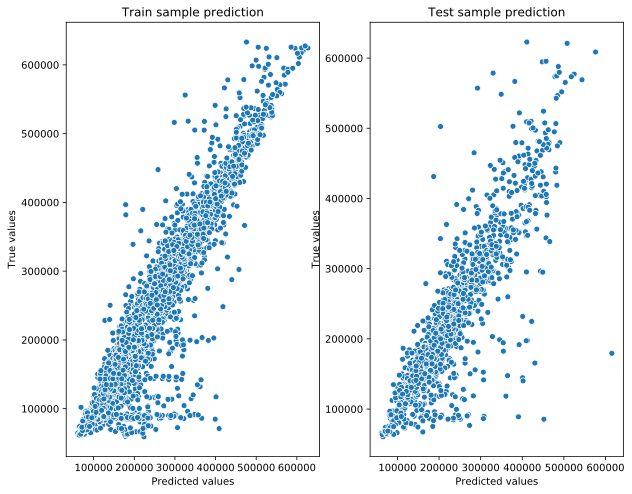

In [29]:
y_train_preds = GBoosting_model.predict(X_train)
y_test_preds = GBoosting_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [30]:
feature_importances = pd.DataFrame(zip(X.columns, GBoosting_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
3,Square,0.423267
19,Median_Price_Square_byDistr,0.404329
2,Rooms,0.035257
8,HouseYear,0.019931
7,HouseFloor,0.015567
5,KitchenSquare,0.014202
4,LifeSquare,0.013886
9,Ecology_1,0.010719
6,Floor,0.010691
12,Social_1,0.009482


In [ ]:
# На этапе отбора признаков удаление признаков было решено не производить.

In [31]:
class DataPreprocessing:
    """Подготовка исходных данных"""
    def __init__(self):
        """Параметры класса"""
        self.medians=None
    def fit(self, X):
        """Сохранение статистик"""       
        self.medians = X.median()

    def transform(self, X):
        """Трансформация данных"""
        # Square
        for i, val in X['Square'].iteritems():
            if val < X['LifeSquare'][i]:
                X['Square'][i] = X['LifeSquare'][i]
                print(f'в строке с индексом {i} было заменено значение в признаке Square')
        
        # Rooms
        for i, val in X['Rooms'].iteritems():
            if val == 0.0 and len(X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & \
                                              (X['Square'] < X['Square'].iloc[i] + 1) & \
                                              (X['Square'] > X['Square'].iloc[i] - 1)]) > 6:
                table1 = X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & \
                                     (X['Square'] < X['Square'].iloc[i] + 1) & \
                                     (X['Square'] > X['Square'].iloc[i] - 1)]
                X['Rooms'][i] = table1['Rooms'].value_counts().index[0]
                print(f"строка {i} признака Rooms заменена на значение {table1['Rooms'].value_counts().index[0]}")

            if val == 0.0 and (len(X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & \
                                               (X['Square'] < X['Square'].iloc[i] + 1) & \
                                               (X['Square'] > X['Square'].iloc[i] - 1)]) in [3, 4, 5, 6]):
                table2 = X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & \
                                     (X['Square'] < X['Square'].iloc[i] + 3) & \
                                     (X['Square'] > X['Square'].iloc[i] - 3)]
                X['Rooms'][i] = table2['Rooms'].value_counts().index[0]
                print(f"строка {i} признака Rooms заменена на значение {table2['Rooms'].value_counts().index[0]}")

            if val == 0.0 and (len(X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & \
                                               (X['Square'] < X['Square'].iloc[i] + 1) & \
                                               (X['Square'] > X['Square'].iloc[i] - 1)]) == 2):
                table3 = X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & \
                                     (X['Square'] < X['Square'].iloc[i] + 20) & \
                                     (X['Square'] > X['Square'].iloc[i] - 20)]
                X['Rooms'][i] = table3['Rooms'].value_counts().index[0]
                print(f"строка {i} признака Rooms заменена на значение {table3['Rooms'].value_counts().index[0]}")

            if val == 0.0 and (len(X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & \
                                               (X['Square'] < X['Square'].iloc[i] + 1) & \
                                               (X['Square'] > X['Square'].iloc[i] - 1)]) == 1):
                table4 = X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & \
                                     (X['Square'] < X['Square'].iloc[i] + 100) & \
                                     (X['Square'] > X['Square'].iloc[i] - 100)]
                X['Rooms'][i] = table4['Rooms'].value_counts().index[0]
                print(f"строка {i} признака Rooms заменена на значение {table4['Rooms'].value_counts().index[0]}")

            if val < 0.0:
                print(f"Найдены отрицательные значения!!! Необходимо исправить {i} в признаке Rooms")

      
        for i, val in X['Rooms'].iteritems():
            if val > 5.0:
                step1 = X.loc[(X['Square'] < X['Square'].iloc[i] + 6) & \
                                (X['Square'] > X['Square'].iloc[i] - 6)].drop([i])
                step1_mod = step1['Rooms'].value_counts()
                if not step1_mod.empty and val > (step1['Rooms'].value_counts().index[0] + 1.0):
                    X['Rooms'][i] = step1['Rooms'].value_counts().index[0]
                    print(f"строка {i} признака Rooms заменена на значение {step1['Rooms'].value_counts().index[0]}")

        # LifeSquare
        for i, val in X['LifeSquare'].iteritems():
            if np.isnan(val):
                tabble = (X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & (X['Rooms'] == X['Rooms'].iloc[i])])
                score = []
                for j, k in zip(tabble['Square'], tabble['LifeSquare']):
                    sc_division = (tabble['Square'][i]) / (j / k)
                    score.append(sc_division)
                sc_medain = pd.Series(score).dropna().median()
                if not np.isnan(sc_medain):
                    X['LifeSquare'][i] = sc_medain
                    print(f"строка {i}(NaN) в признаке LifeSquare заменена на {sc_medain}")
        # Дополнительный алг-м, который проверит еще раз весь признак и установит минимальное значение, если основной алг-м не сработает.
        if X['LifeSquare'].isna().sum() > 0:
            print(f"!!! {X['LifeSquare'].isna().sum()} были заменены вне алгоритма(замена на мин.значения по признаку LifeSquare)")
            X['LifeSquare'].fillna(X['LifeSquare'].min(), inplace=True)
        
        count = 0
        for j, k in zip(X['LifeSquare'], X['Square']):
            if (j / k) < 0.2:
                print(f"найдено {j}")
                i = (X.loc[X['LifeSquare'] == j]['LifeSquare']).index[0]
                X['LifeSquare'][i] = ((X.loc[X['Square'] == k]['Square'].values[0]) * 0.8)
                count += 1
                print(f"строка {i} в признаке 'LifeSquare' заменена на {((X.loc[X['Square'] == k]['Square'].values[0]) * 0.8)}\n")
        print(f'Всего заменено {count} значений')

        # KitchenSquare
        for i, val in X['KitchenSquare'].iteritems():
            if val > X['Square'][i]:
                X['KitchenSquare'][i] = round(X['Square'][i] * 0.9, 0)
                print(f"строка {i} в признаке KitchenSquare была заменена на {X['Square'][i] * 0.9}")
        # Дополнительный алгоритм (если алгоритм пропустит какие-либо некорректные значения)
        for i in X.index:
            if X['KitchenSquare'][i] > X['Square'][i]:
                print(f"{i} не исправлено")

        # HouseYear
        for i, val in X['HouseYear'].iteritems():
            if val < 1800:
                X['HouseYear'][i] = 1800
            if val > 2021:
                h_table = X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i])]
                h_table_m = h_table['HouseYear'].median()
                X['HouseYear'][i] = round(h_table_m, 0)
                print(f"строка {i} признака HouseYear была заменена на {h_table_m}")
        print('------- \n')       

        # HouseFloor
        for i, val in X['HouseFloor'].iteritems():
            if X['HouseFloor'][i] < X['Floor'][i]:
                h_val = X.loc[(X['DistrictId'] == X['DistrictId'].iloc[i]) & (X['HouseYear'] == X['HouseYear'].iloc[i]) & \
                              (X['Ecology_1'] == X['Ecology_1'].iloc[i])]
                h_val_m = h_val['HouseFloor'].max()  
                X['HouseFloor'][i] = h_val_m
                print(f"строка {i} в признаке HouseFloor заменена на {h_val_m}")
        # Дополнительный агоритм, который проверит заполнение и заполнит сам, если предыдущий не подобрал подходящие значения
        # или подобрал их некорректно.
        for i, val in X['HouseFloor'].iteritems():
            if X['HouseFloor'][i] < X['Floor'][i]:
                X['HouseFloor'][i] = X['Floor'][i]
                print(f"Дополнительно было заменено: строка {i} признака HouseFloor на значение {X['Floor'][i]}")

        # Healthcare_1 
        for i, val in X['Healthcare_1'].iteritems():
            if np.isnan(val):
                hc_val = np.random.choice(X['Healthcare_1'], 1)[0]
                while np.isnan(hc_val):
                    hc_val = np.random.choice(X['Healthcare_1'], 1)[0]

                X['Healthcare_1'][i] = hc_val
                print(f"строка {i}(NaN) в признаке Healthcare_1 заменена на {hc_val}")
        
        if (X.isna().sum().values).sum() > 0:
            X.fillna(0)
            print('ДОПОЛНИТЕЛЬНО БЫЛИ ЗАМЕНЕНЫ ПУСТЫЕ ЯЧЕЙКИ НА 0')
        
        return X

#### Прогнозирование на тестовом датасете <a class='anchor' id='prediction'>

In [32]:
preprocessor = DataPreprocessing()
my_test = preprocessor.transform(my_test)

в строке с индексом 1 было заменено значение в признаке Square
в строке с индексом 25 было заменено значение в признаке Square
в строке с индексом 28 было заменено значение в признаке Square
в строке с индексом 39 было заменено значение в признаке Square
в строке с индексом 48 было заменено значение в признаке Square
в строке с индексом 58 было заменено значение в признаке Square
в строке с индексом 131 было заменено значение в признаке Square
в строке с индексом 160 было заменено значение в признаке Square
в строке с индексом 181 было заменено значение в признаке Square
в строке с индексом 223 было заменено значение в признаке Square
в строке с индексом 228 было заменено значение в признаке Square
в строке с индексом 230 было заменено значение в признаке Square
в строке с индексом 237 было заменено значение в признаке Square
в строке с индексом 241 было заменено значение в признаке Square
в строке с индексом 247 было заменено значение в признаке Square
в строке с индексом 257 было зам

In [33]:
for i in my_test.columns:
    if True in my_test[i].isna().unique() or my_test[i].isnull().unique():
        print(f"   >>>>>>>> !!! В данных есть пропуски, а именно в {i}")
    else:
        print(f"{i}. В этих данные нет пропусков")

Id. В этих данные нет пропусков
DistrictId. В этих данные нет пропусков
Rooms. В этих данные нет пропусков
Square. В этих данные нет пропусков
LifeSquare. В этих данные нет пропусков
KitchenSquare. В этих данные нет пропусков
Floor. В этих данные нет пропусков
HouseFloor. В этих данные нет пропусков
HouseYear. В этих данные нет пропусков
Ecology_1. В этих данные нет пропусков
Ecology_2. В этих данные нет пропусков
Ecology_3. В этих данные нет пропусков
Social_1. В этих данные нет пропусков
Social_2. В этих данные нет пропусков
Social_3. В этих данные нет пропусков
Healthcare_1. В этих данные нет пропусков
Helthcare_2. В этих данные нет пропусков
Shops_1. В этих данные нет пропусков
Shops_2. В этих данные нет пропусков


In [34]:
# Преобразуем некоторые признаки в дамми-значения
my_test['Ecology_2'] = pd.get_dummies(my_test['Ecology_2'])
my_test['Ecology_3'] = pd.get_dummies(my_test['Ecology_3'])
my_test['Shops_2'] = pd.get_dummies(my_test['Shops_2'])

In [35]:
my_test = my_test.merge(Median_Price_Square_byDistr, on=['DistrictId'], how='left')
my_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Median_Price_Square_byDistr
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,0,0,24,4378,0,1036.0,1,1,0,4610.0
1,5925,62,1.0,42.568133,42.568133,10.0,7,17.0,2017,0.072158,0,0,2,629,1,240.0,0,0,1,2590.0
2,960,27,2.0,59.463678,41.203613,9.0,19,19.0,1977,0.211401,0,0,9,1892,0,80.0,0,1,0,2755.0
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,0,0,2,475,0,1322.0,0,0,0,2268.0
4,746,74,1.0,53.837056,39.224999,1.0,8,17.0,1977,0.309479,0,0,35,7715,4,990.0,0,6,0,3284.0


In [36]:
my_test['Median_Price_Square_byDistr'] = my_test['Median_Price_Square_byDistr'].fillna(my_test['Median_Price_Square_byDistr'].median())

In [37]:
my_test['Median_Price_Square_byDistr'].isna().sum()

0

In [38]:
my_test['All_Social'] = my_test['Social_1'] + my_test['Social_2'] + my_test['Social_3']

In [39]:
my_train.isna().sum()

Id                             0
DistrictId                     0
Rooms                          0
Square                         0
LifeSquare                     0
KitchenSquare                  0
Floor                          0
HouseFloor                     0
HouseYear                      0
Ecology_1                      0
Ecology_2                      0
Ecology_3                      0
Social_1                       0
Social_2                       0
Social_3                       0
Healthcare_1                   0
Helthcare_2                    0
Shops_1                        0
Shops_2                        0
Price                          0
Median_Price_Square_byDistr    0
All_Social                     0
dtype: int64

In [40]:
my_test[cols_for_scale] = mn_scaler.transform(my_test[cols_for_scale])

In [41]:
my_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Median_Price_Square_byDistr,All_Social
0,4567,0.210526,1.0,36.847630,19.094182,5.0,0.097561,0.068966,0.545455,0.036122,...,0,24,4378,0,0.213652,1,1,0,4610.0,4402
1,5925,0.296651,1.0,42.568133,42.568133,10.0,0.146341,0.137931,0.972727,0.072158,...,0,2,629,1,0.049495,0,0,1,2590.0,632
2,960,0.129187,2.0,59.463678,41.203613,9.0,0.439024,0.155172,0.609091,0.211401,...,0,9,1892,0,0.016498,0,1,0,2755.0,1901
3,3848,0.110048,3.0,49.646030,33.893825,6.0,0.024390,0.008621,0.500000,0.014073,...,0,2,475,0,0.272634,0,0,0,2268.0,477
4,746,0.354067,1.0,53.837056,39.224999,1.0,0.170732,0.137931,0.609091,0.309479,...,0,35,7715,4,0.204166,0,6,0,3284.0,7754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,0.138756,2.0,43.177521,30.339945,5.0,0.121951,0.043103,0.472727,0.069660,...,0,31,6119,4,0.406269,1,2,0,4186.0,6154
4996,16138,0.181818,3.0,94.521465,94.521465,10.0,0.487805,0.224138,0.981818,0.060753,...,0,15,2787,2,0.107239,0,7,0,4630.5,2804
4997,3912,0.483254,1.0,33.656723,19.003259,5.0,0.024390,0.034483,0.509091,0.038693,...,0,28,6533,1,0.209322,2,5,0,4188.0,6562
4998,5722,0.047847,1.0,38.635155,20.976257,9.0,0.170732,0.112069,0.545455,0.089040,...,0,33,7976,5,0.006599,0,11,0,4458.5,8014


In [42]:
predictions = GBoosting_model.predict(my_test)
predictions

array([167500.03012981, 121465.62327134, 142531.56225973, ...,
       146543.04069731, 187061.73613146, 296011.25527988])

In [43]:
submit = pd.read_csv(r'C:\Users\Anokiro\courswork_ML\sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [44]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,167500.030130
1,5925,121465.623271
2,960,142531.562260
3,3848,112581.763969
4,746,174067.975358


In [ ]:
submit.to_csv('anokiro21_submit.csv', index=False)

#### В результате выполнения основной части курсовой метрика R2 на тестовом датасете составила 0.72656 (Kaggle)

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Дополнительная часть курсовой работы.  <a class='anchor' id='optional'>

### Выполнение основной части курсовой работы характеризует освоение материала курса.
### Однако в процессе многочисленных экспериментов, связанных с отчисткой данных в датасете, преобразованием и формированием новых призаков в датасете, а также отбором признаков, настройкой параметров моделей машинного обучения, стало ясно, что в целях достижения высоких показателей метрики R2 в рамках соревнования на Kaggle оптимальным является выполнение нижеследующих действий.

In [45]:
my_train2 = pd.read_csv(r'C:\Users\Anokiro\courswork_ML\train.csv')
my_test2 = pd.read_csv(r'C:\Users\Anokiro\courswork_ML\test.csv')

In [46]:
my_train2['LifeSquare'] = my_train2['LifeSquare'].fillna( my_train2['LifeSquare'].median() )
my_train2['Healthcare_1'] = my_train2['Healthcare_1'].fillna( my_train2['Healthcare_1'].median() )
my_train2['Ecology_2'] = pd.get_dummies(my_train2['Ecology_2'])
my_train2['Ecology_3'] = pd.get_dummies(my_train2['Ecology_3'])
my_train2['Shops_2'] = pd.get_dummies(my_train2['Shops_2'])

In [47]:
my_train2['All_Shops'] = my_train2['Shops_1'] + my_train2['Shops_2']

In [48]:
my_train2['All_Social'] = my_train2['Social_1'] + my_train2['Social_2'] + my_train2['Social_3']

In [49]:
X = my_train2.drop('Price', axis=1)
y = my_train2['Price']

In [50]:
%%time
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.21, random_state=99)
GBoosting_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=5,
                                        min_samples_leaf=3,
                                        random_state=99,
                                        n_estimators=300)

GBoosting_model.fit(X_train, y_train)
y_pred_GBoosting_model = GBoosting_model.predict(X_valid)
GBoosting_model_r2 = r2_score(y_valid, y_pred_GBoosting_model)
GBoosting_model_r2

Wall time: 7.66 s


0.7649486632603604

In [51]:
my_test2['LifeSquare'] = my_test2['LifeSquare'].fillna( my_test2['LifeSquare'].median() )
my_test2['Healthcare_1'] = my_test2['Healthcare_1'].fillna( my_test2['Healthcare_1'].median() )
my_test2['Ecology_2'] = pd.get_dummies(my_test2['Ecology_2'])
my_test2['Ecology_3'] = pd.get_dummies(my_test2['Ecology_3'])
my_test2['Shops_2'] = pd.get_dummies(my_test2['Shops_2'])

In [52]:
my_test2['All_Shops'] = my_test2['Shops_1'] + my_test2['Shops_2']

In [53]:
my_test2['All_Social'] = my_test2['Social_1'] + my_test2['Social_2'] + my_test2['Social_3']

In [54]:
predictions = GBoosting_model.predict(my_test2)
predictions
submit = pd.read_csv(r'C:\Users\Anokiro\courswork_ML\sample_submission.csv')
submit.head()
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,167237.773474
1,5925,125881.442996
2,960,138952.644044
3,3848,121712.846908
4,746,191444.313546


In [ ]:
submit.to_csv('fly1(2prizn).csv', index=False)

#### В результате данной комбинации метрика R2 на тестовом датасете составила 0.75034 (Kaggle)

###### Конец курсовой работы.